 <center><h1>Analyse de l'Attrition des Employés chez HumanForYou</h1></center>
    <p>L'analyse de l'attrition des employés est cruciale pour comprendre les facteurs qui influent sur la rétention du personnel au sein d'une entreprise. Dans ce contexte, nous examinons le jeu de données "general_data" relatif aux employés de HumanForYou pour l'année 2015, avec un accent particulier sur l'attrition enregistrée au cours de l'année 2016. Cette analyse vise à identifier les caractéristiques et les tendances qui pourraient être liées au départ des employés.</p>
    <h2>Objectif</h2>
        <p>
            L'objectif principal de cette étude est de comprendre les motifs de l'attrition au sein de HumanForYou et
            d'identifier les variables qui pourraient jouer un rôle significatif dans le départ des employés. En utilisant
            les données disponibles, nous chercherons à répondre à des questions telles que : Quelles sont les
            caractéristiques communes des employés ayant quitté l'entreprise ? Existe-t-il des corrélations entre
            l'attrition et des facteurs tels que l'âge, le niveau d'éducation, le salaire, l'expérience, etc. ?
        </p>
    <h2> Description du Dataset</h2>
        <p>
            Le jeu de données "general_data" contient des informations variées sur les employés de HumanForYou pour
            l'année 2015. 
        </P>
        <p>
            L'analyse de ces données nous permettra de formuler des recommandations pour améliorer la rétention des
            employés au sein de HumanForYou.
        </p>

    

### **Partie 1: Importation des bibliothèques**

In [152]:
import pandas as pd
from work_tools import * # Ici se trouvent nos propres fonctions

### **Import des données**

In [153]:
# Charger les données depuis le fichier CSV 'general_data.csv'

general_data = pd.read_csv('./general_data.csv')

In [154]:
# Afficher les dix premières lignes du DataFrame 'general_data'
general_data.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,3.0,Y,13,8,0,28.0,5,7,7,7
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,2.0,Y,22,8,3,10.0,2,0,0,0
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,...,0.0,Y,21,8,0,10.0,2,9,7,8
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,...,1.0,Y,13,8,1,6.0,2,6,1,5


In [155]:
# Afficher les dimensions du DataFrame 'general_data' (nombre de lignes et de colonnes)

general_data.shape

(4410, 24)

  <p>Les dimensions (shape) (4410, 24), représentent le nombre de lignes et de colonnes du DataFrame. En particulier :</p>

  <ul>
    <li>Pour le DataFrame 'manager_survey': Il comporte également 4410 lignes et 24 colonnes.</li>
  </ul>

  <p>Ces nombres indiquent que chaque DataFrame contient 4410 enregistrements (entrées ou observations) et 3 variables (attributs ou colonnes).</p>

In [156]:

# Affiche des informations essentielles sur la structure et les types de données dans la base de données
# Cela inclut le nombre total d'entrées, les types de données de chaque colonne .
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [157]:
# Génère un résumé statistique des variables numériques de la base de données
# La transposition (T) est utilisée pour afficher les statistiques par colonne plutôt que par ligne.
# Cela inclut la moyenne, l'écart-type, les valeurs minimum et maximum, ainsi que les quartiles.
general_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


Vérification des Valeurs Nulles dans les Colonnes à Manipuler

In [158]:
# Afficher le nombre de valeurs nulles par colonne dans le DataFrame 'general_data'
general_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


==> Lors de l'analyse des résultats obtenus à partir de general_data.isna().sum(), vous pouvez noter ce qui suit :
 
1-Colonnes sans valeurs manquantes :

Les colonnes telles que "Age", "Attrition", "BusinessTravel", "Department", "DistanceFromHome", "Education", "EducationField", "EmployeeCount", "EmployeeID", "Gender", "JobLevel", "JobRole", "MaritalStatus", "MonthlyIncome", "Over18", "PercentSalaryHike", "StandardHours", "StockOptionLevel", "TrainingTimesLastYear", "YearsAtCompany", "YearsSinceLastPromotion", et "YearsWithCurrManager" ne présentent aucune valeur manquante.

2-Colonnes avec des valeurs manquantes :

Les colonnes "NumCompaniesWorked" ont 19 valeurs manquantes.
Les colonnes "TotalWorkingYears" ont 9 valeurs manquantes.

In [159]:
# La fonction check_for_duplicates est  définie  dans le fichier work_tools.py et elle devrait effectuer une vérification des doublons dans le DataFrame general_data.

check_for_duplicates(general_data)

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeID, Gender, JobLevel, JobRole, MaritalStatus, MonthlyIncome, NumCompaniesWorked, Over18, PercentSalaryHike, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 24 columns]
Number of duplicates: 0
The DataFrame does not contain duplicates.


In [160]:
# Fonction pour remplir les valeurs manquantes dans le DataFrame
general_data = fill_missing_values(general_data)

In [161]:
#verification des valeurs manquantes
general_data.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

Super! Aucune valeur nulle existe dans la dataset

In [162]:
# Afficher le nombre d'éléments uniques dans chaque colonne du DataFrame
unique_counts = general_data.nunique()
print("Nombre d'éléments uniques dans chaque colonne :")
print(unique_counts)


Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 4410
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: int64

In [163]:
# Supprimer les colonnes 'EmployeeCount', 'StandardHours' et 'Over18' du DataFrame

general_data.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1, inplace=True)


==> Ces colonnes semblent contenir des valeurs constantes ou inutiles pour notre analyse

#### **Visualisation des données**

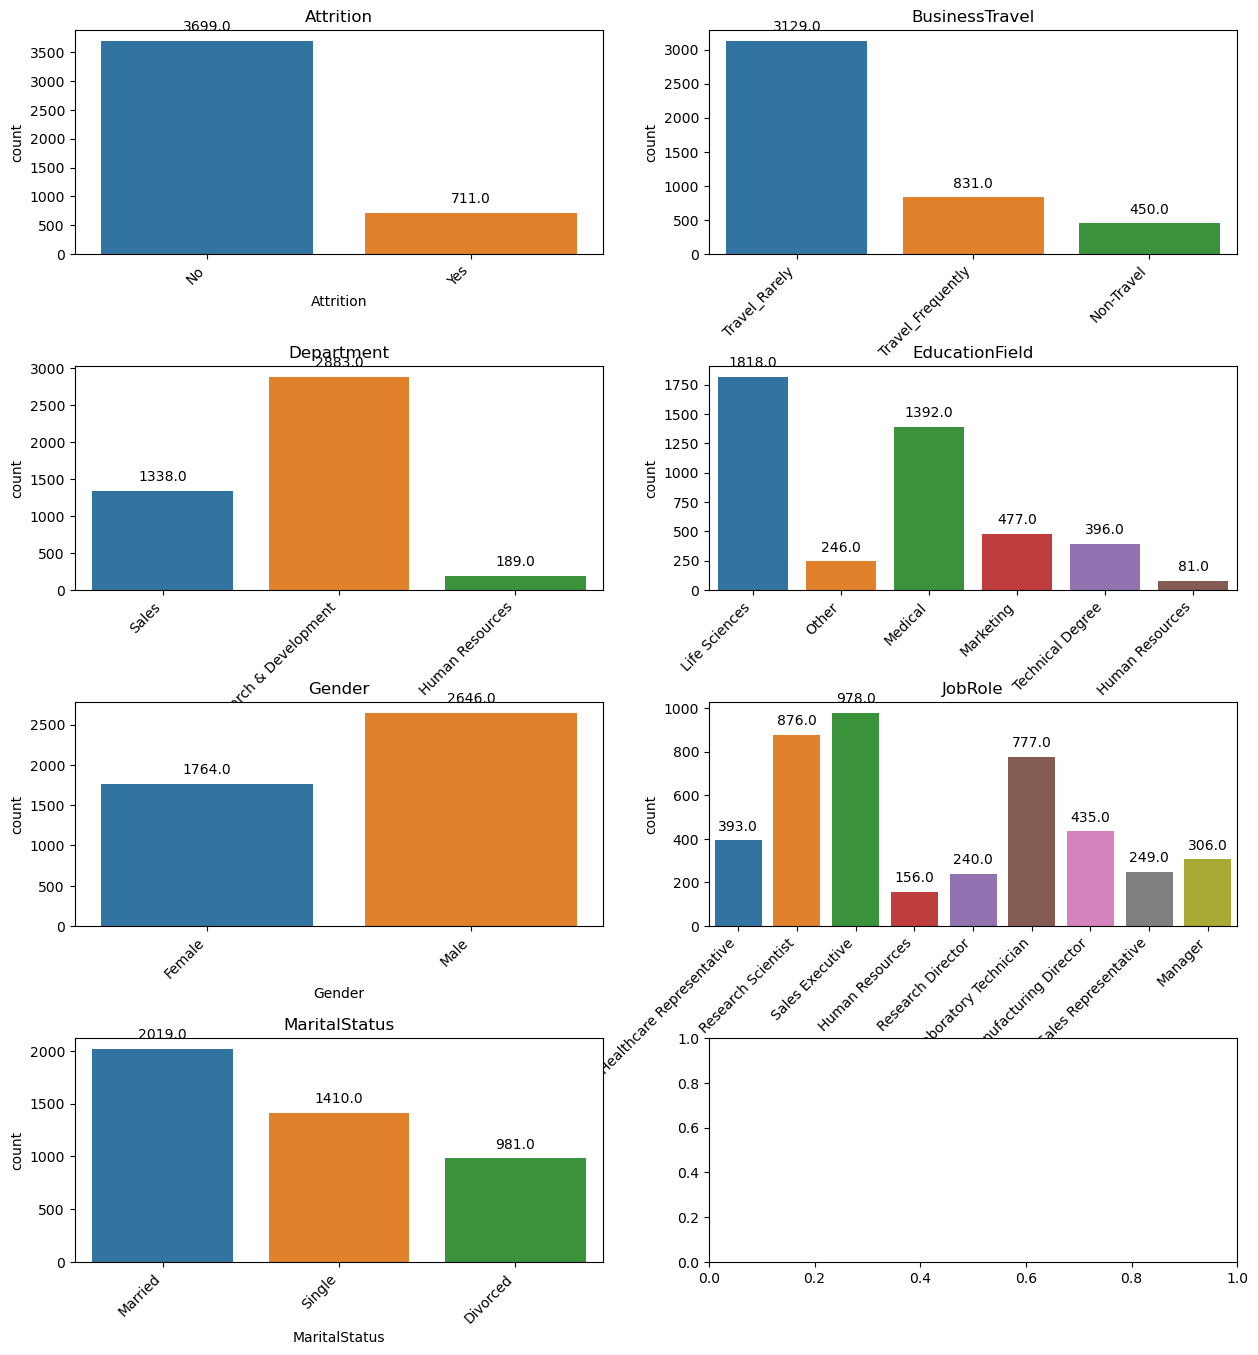

In [164]:
# Fonction pour tracer des graphiques des colonnes catégorielles du DataFrame
plot_categorical_columns(general_data)

==> L'utilisation de la fonction plot_categorical_columns(general_data) indique que vous souhaitez effectuer une analyse visuelle des colonnes catégorielles de votre ensemble de données, en mettant en évidence la distribution de chaque catégorie par rapport à la variable cible "Attrition".
* Ces analyses visuelles peuvent fournir des indications sur les tendances et les schémas au sein de votre ensemble de données. En fonction des observations, vous pourriez décider d'approfondir l'analyse de certaines catégories spécifiques pour mieux comprendre les facteurs influençant l'attrition au sein de l'entreprise.

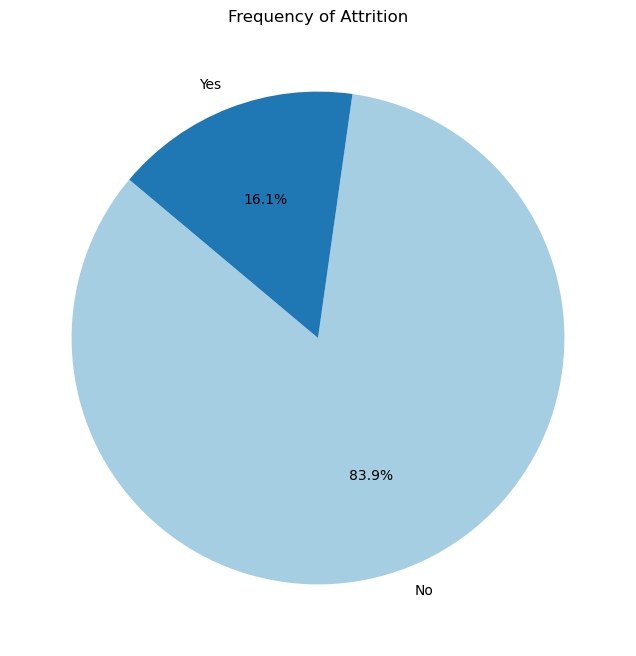

In [165]:
# Fonction pour visualiser la distribution d'une caractéristique catégorielle avec un diagramme circulaire (pie chart)
visualize_object_feature_pie(general_data,'Attrition')

==> L'analyse de la distribution de la variable cible "Attrition" montre que la majorité des employés (83.9%) n'ont pas quitté l'entreprise (No), tandis que 16.1% ont effectivement quitté (Yes). Cette analyse suggère un déséquilibre important entre les deux classes.

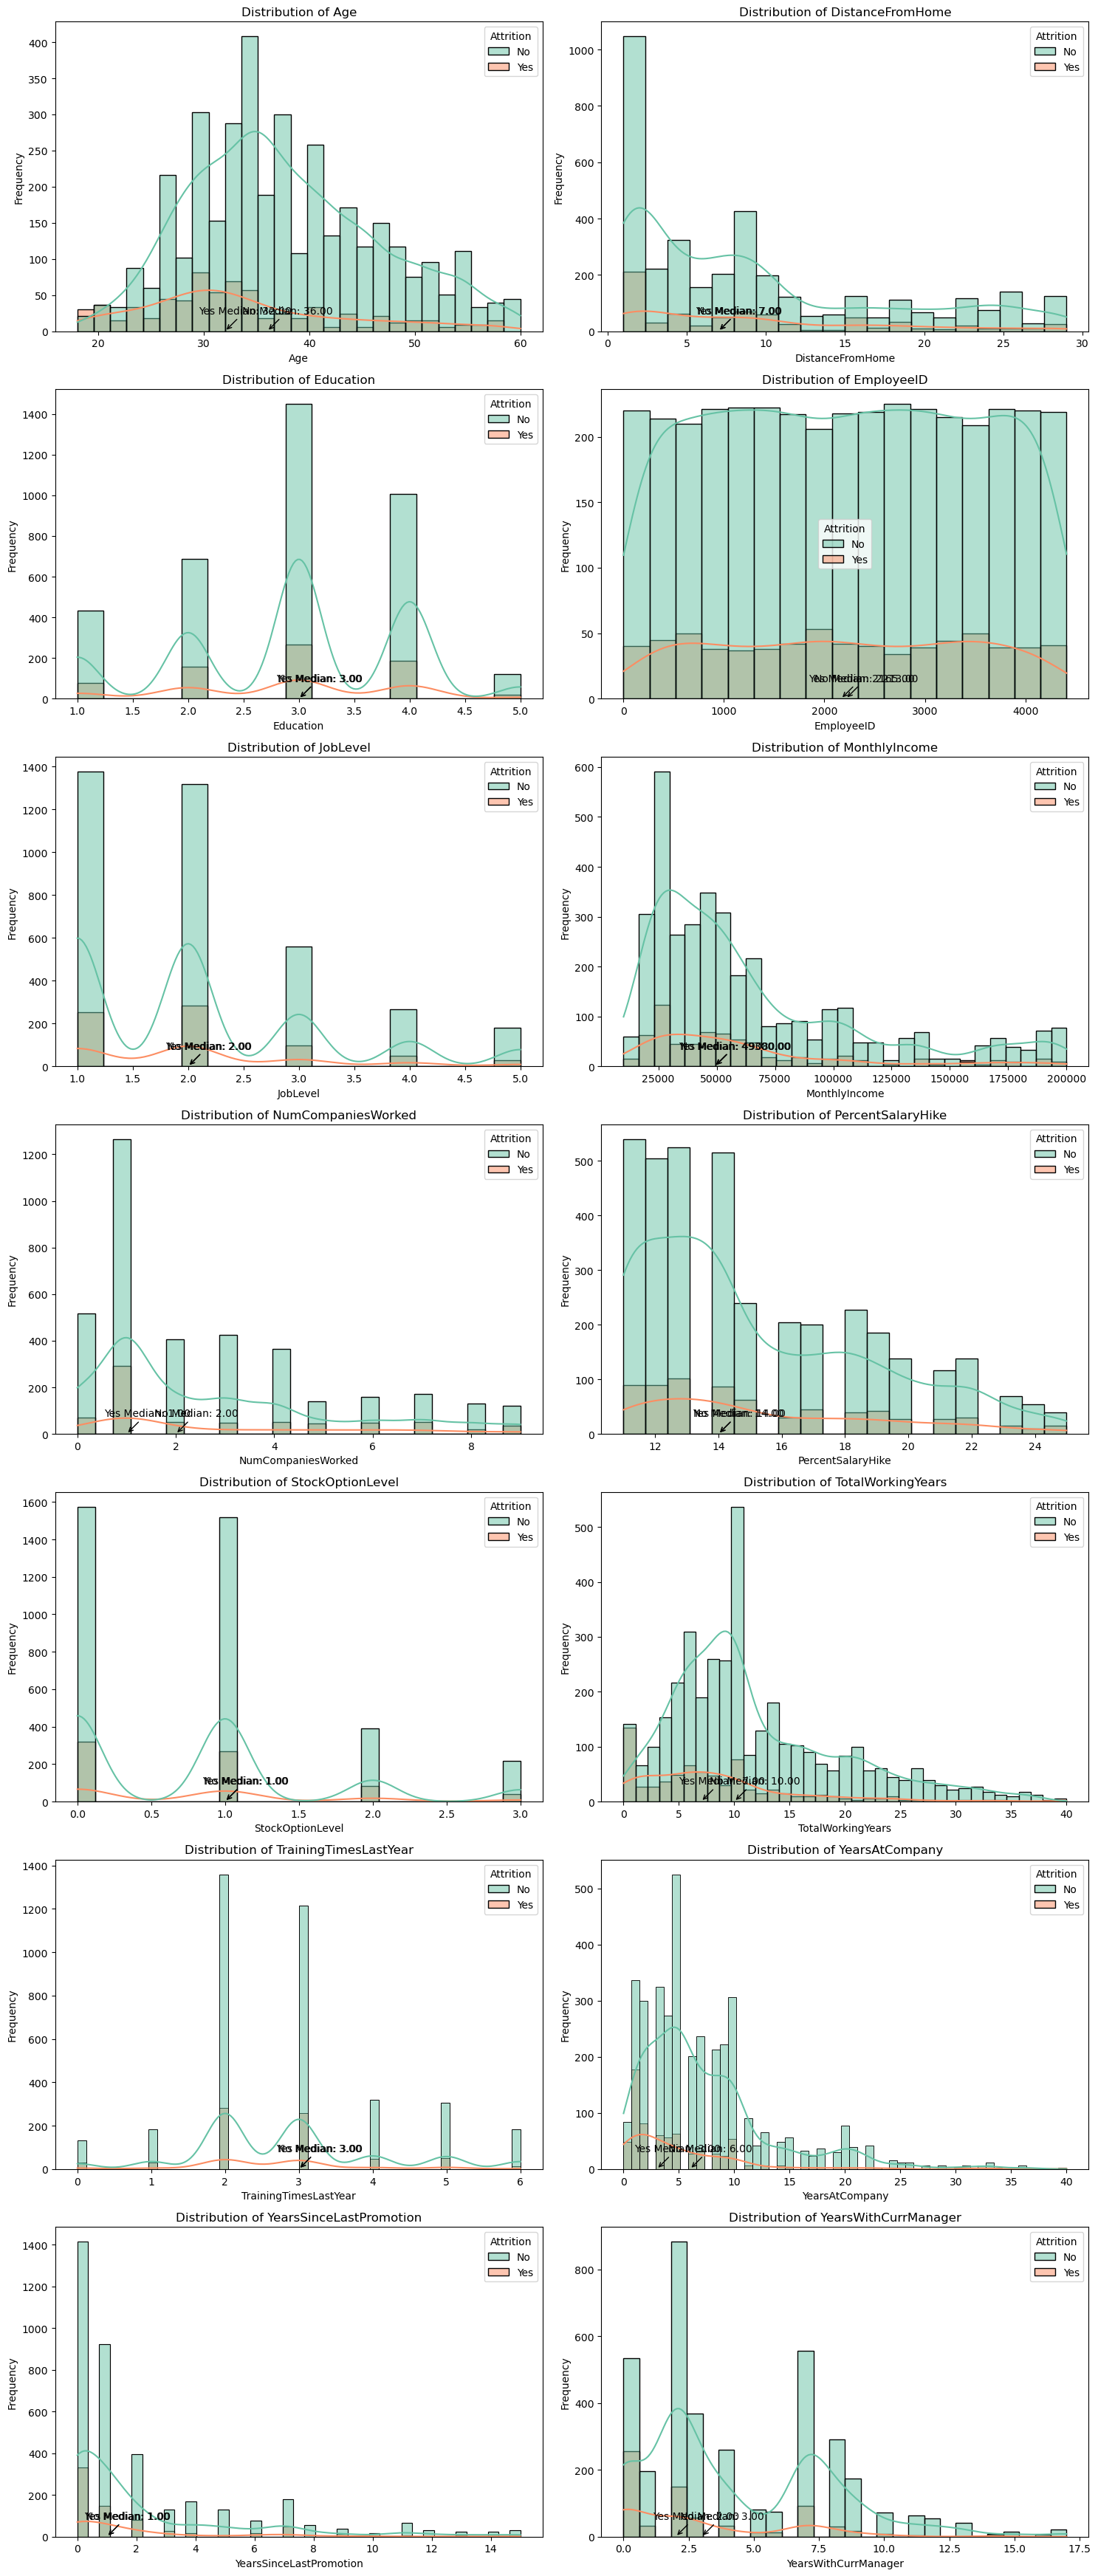

In [166]:
# Fonction pour visualiser la distribution des caractéristiques numériques en fonction d'une variable binaire yes or NO
visualize_numeric_by_binary_object(general_data,'Attrition')

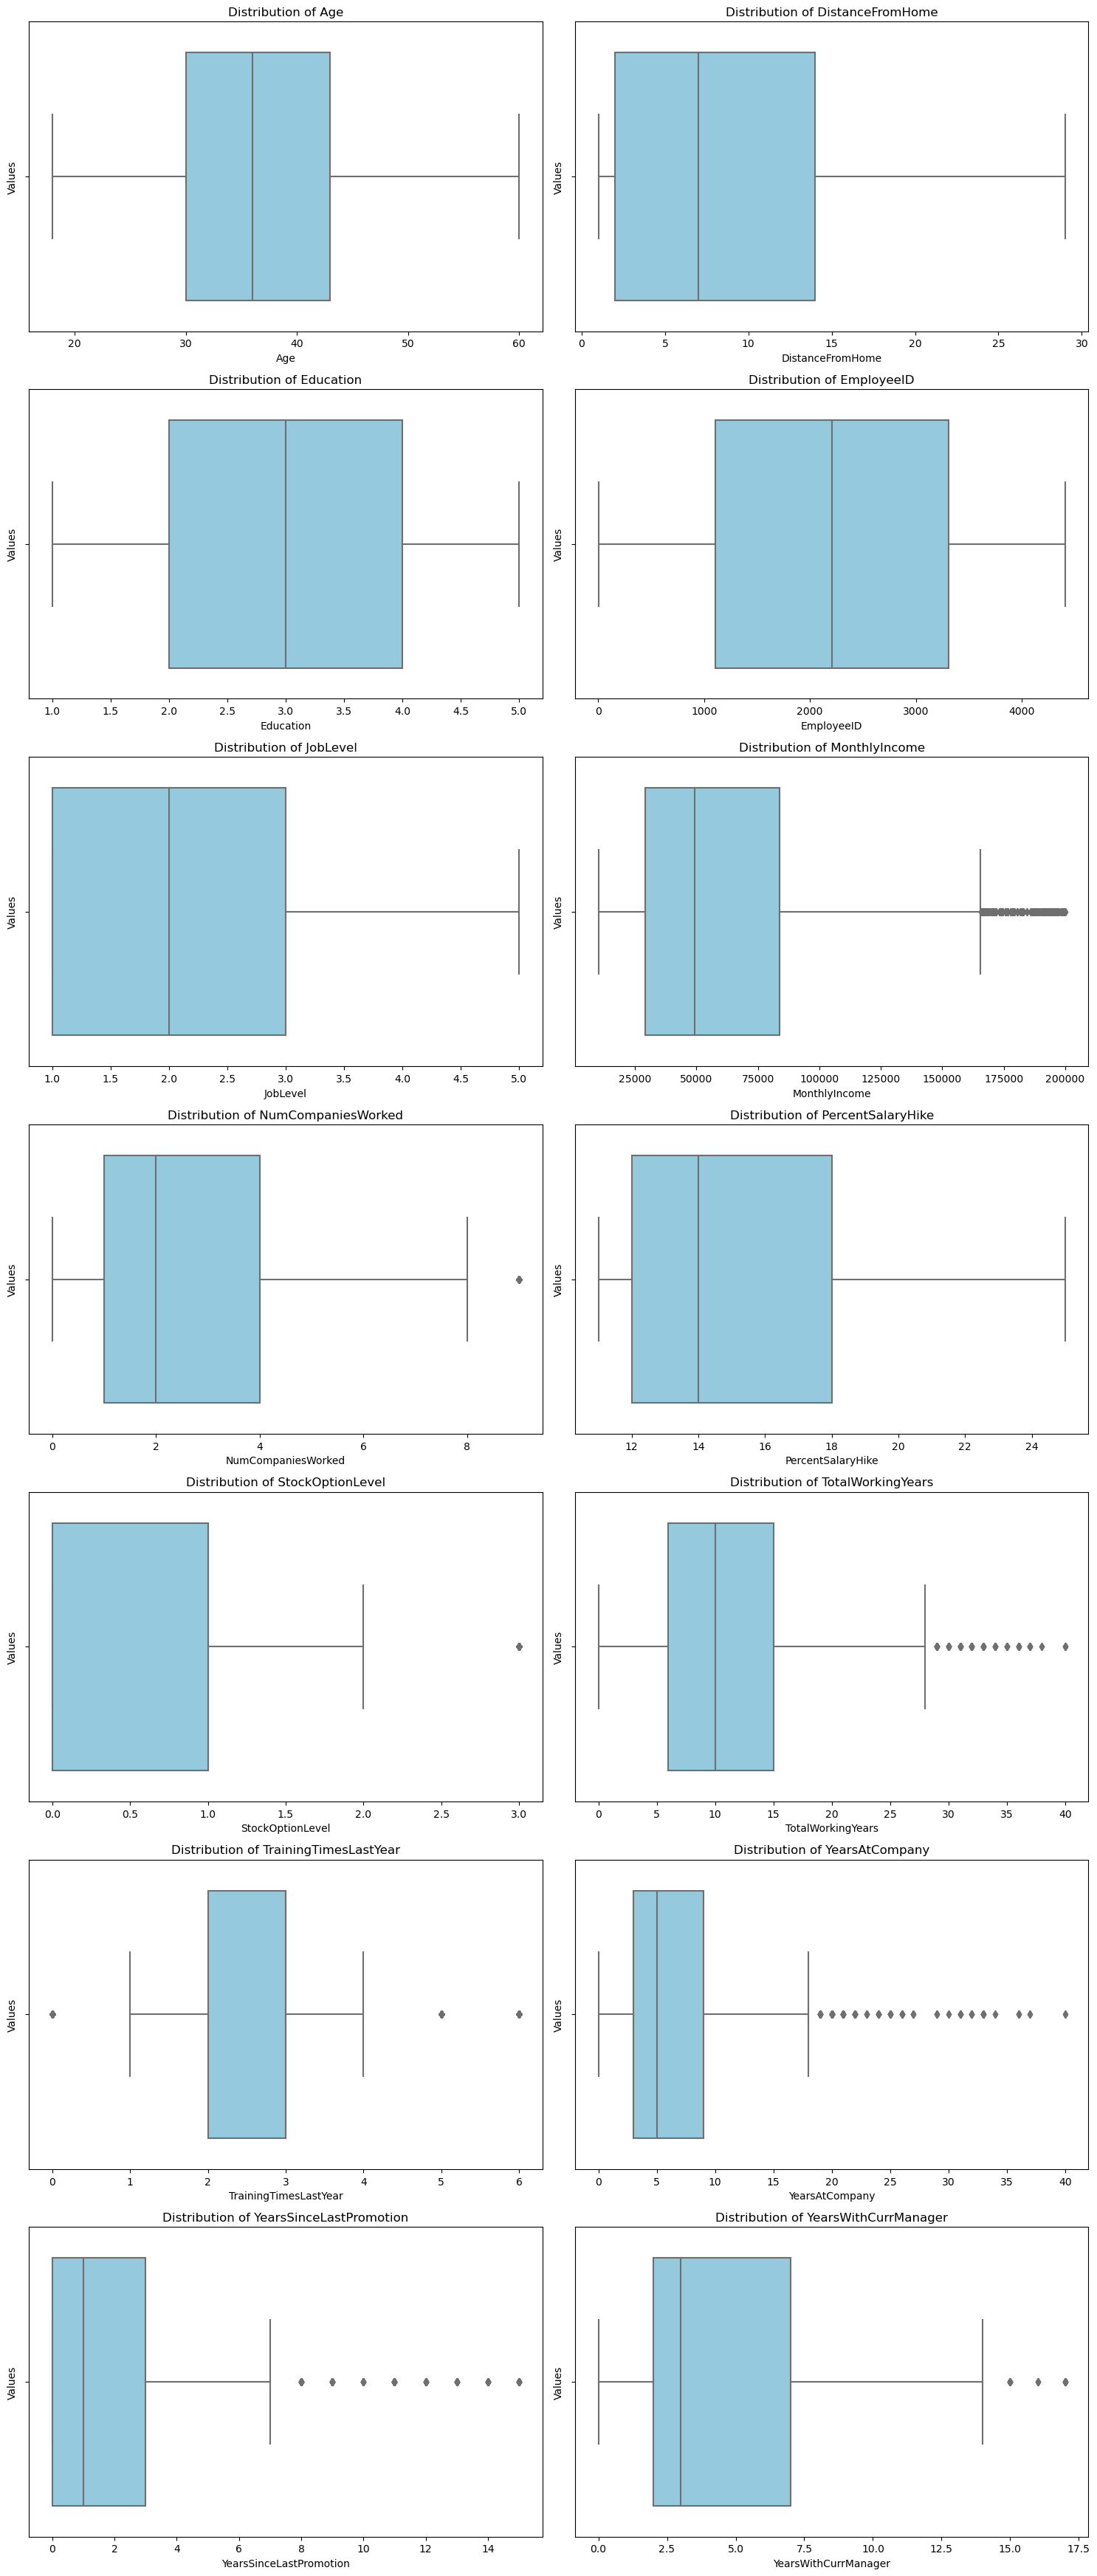

In [167]:
# Fonction pour visualiser la distribution des caractéristiques numériques à l'aide de boîtes à moustaches

visualize_numeric_features_boxplot(general_data)

==> la visualisation à l'aide de boîtes à moustaches offre une vue synthétique et informative des caractéristiques numériques de l'ensemble de données, facilitant la détection visuelle de tendances, de valeurs aberrantes potentielles, et fournissant une base solide pour des analyses plus approfondies.

In [168]:
# Identifier les colonnes avec des valeurs aberrantes dans le DataFrame
results = identify_columns_with_outliers(general_data)

# Afficher les colonnes qui contiennent des valeurs aberrantes et le nombre total de lignes avec des valeurs aberrantes
print(f"Colonnes avec des valeurs aberrantes : {results['columns_with_outliers']}")
print(f"Total de lignes avec des valeurs aberrantes : {results['total_rows_with_outliers']}")

# Boucle pour éliminer les valeurs aberrantes jusqu'à ce qu'il n'y en ait plus
while results['total_outliers'] != 0:
    # Remplacer les valeurs aberrantes par la médiane dans le DataFrame
    general_data = replace_outliers_with_median(general_data)

    # Identifier à nouveau les colonnes avec des valeurs aberrantes
    results = identify_columns_with_outliers(general_data)

# Afficher le nombre total de lignes avec des valeurs aberrantes après le traitement
print(f"Total de lignes avec des valeurs aberrantes après traitement : {results['total_rows_with_outliers']}")


columns_with_outliers: {'MonthlyIncome': 342, 'NumCompaniesWorked': 156, 'StockOptionLevel': 255, 'TotalWorkingYears': 189, 'TrainingTimesLastYear': 714, 'YearsAtCompany': 312, 'YearsSinceLastPromotion': 321, 'YearsWithCurrManager': 42}
total_rows_with_outliers: 1683 / 4410
total_rows_with_outliers: 0 / 4410


==> Total de Lignes avec des Valeurs Aberrantes :

Initialement, 1683 lignes (sur 4410) contenaient au moins une valeur aberrante dans l'une des colonnes spécifiées.

==> Résultats après Traitement des Valeurs Aberrantes :

Après un processus itératif de remplacement des valeurs aberrantes par la médiane, le nombre total de lignes avec des valeurs aberrantes a été réduit à zéro

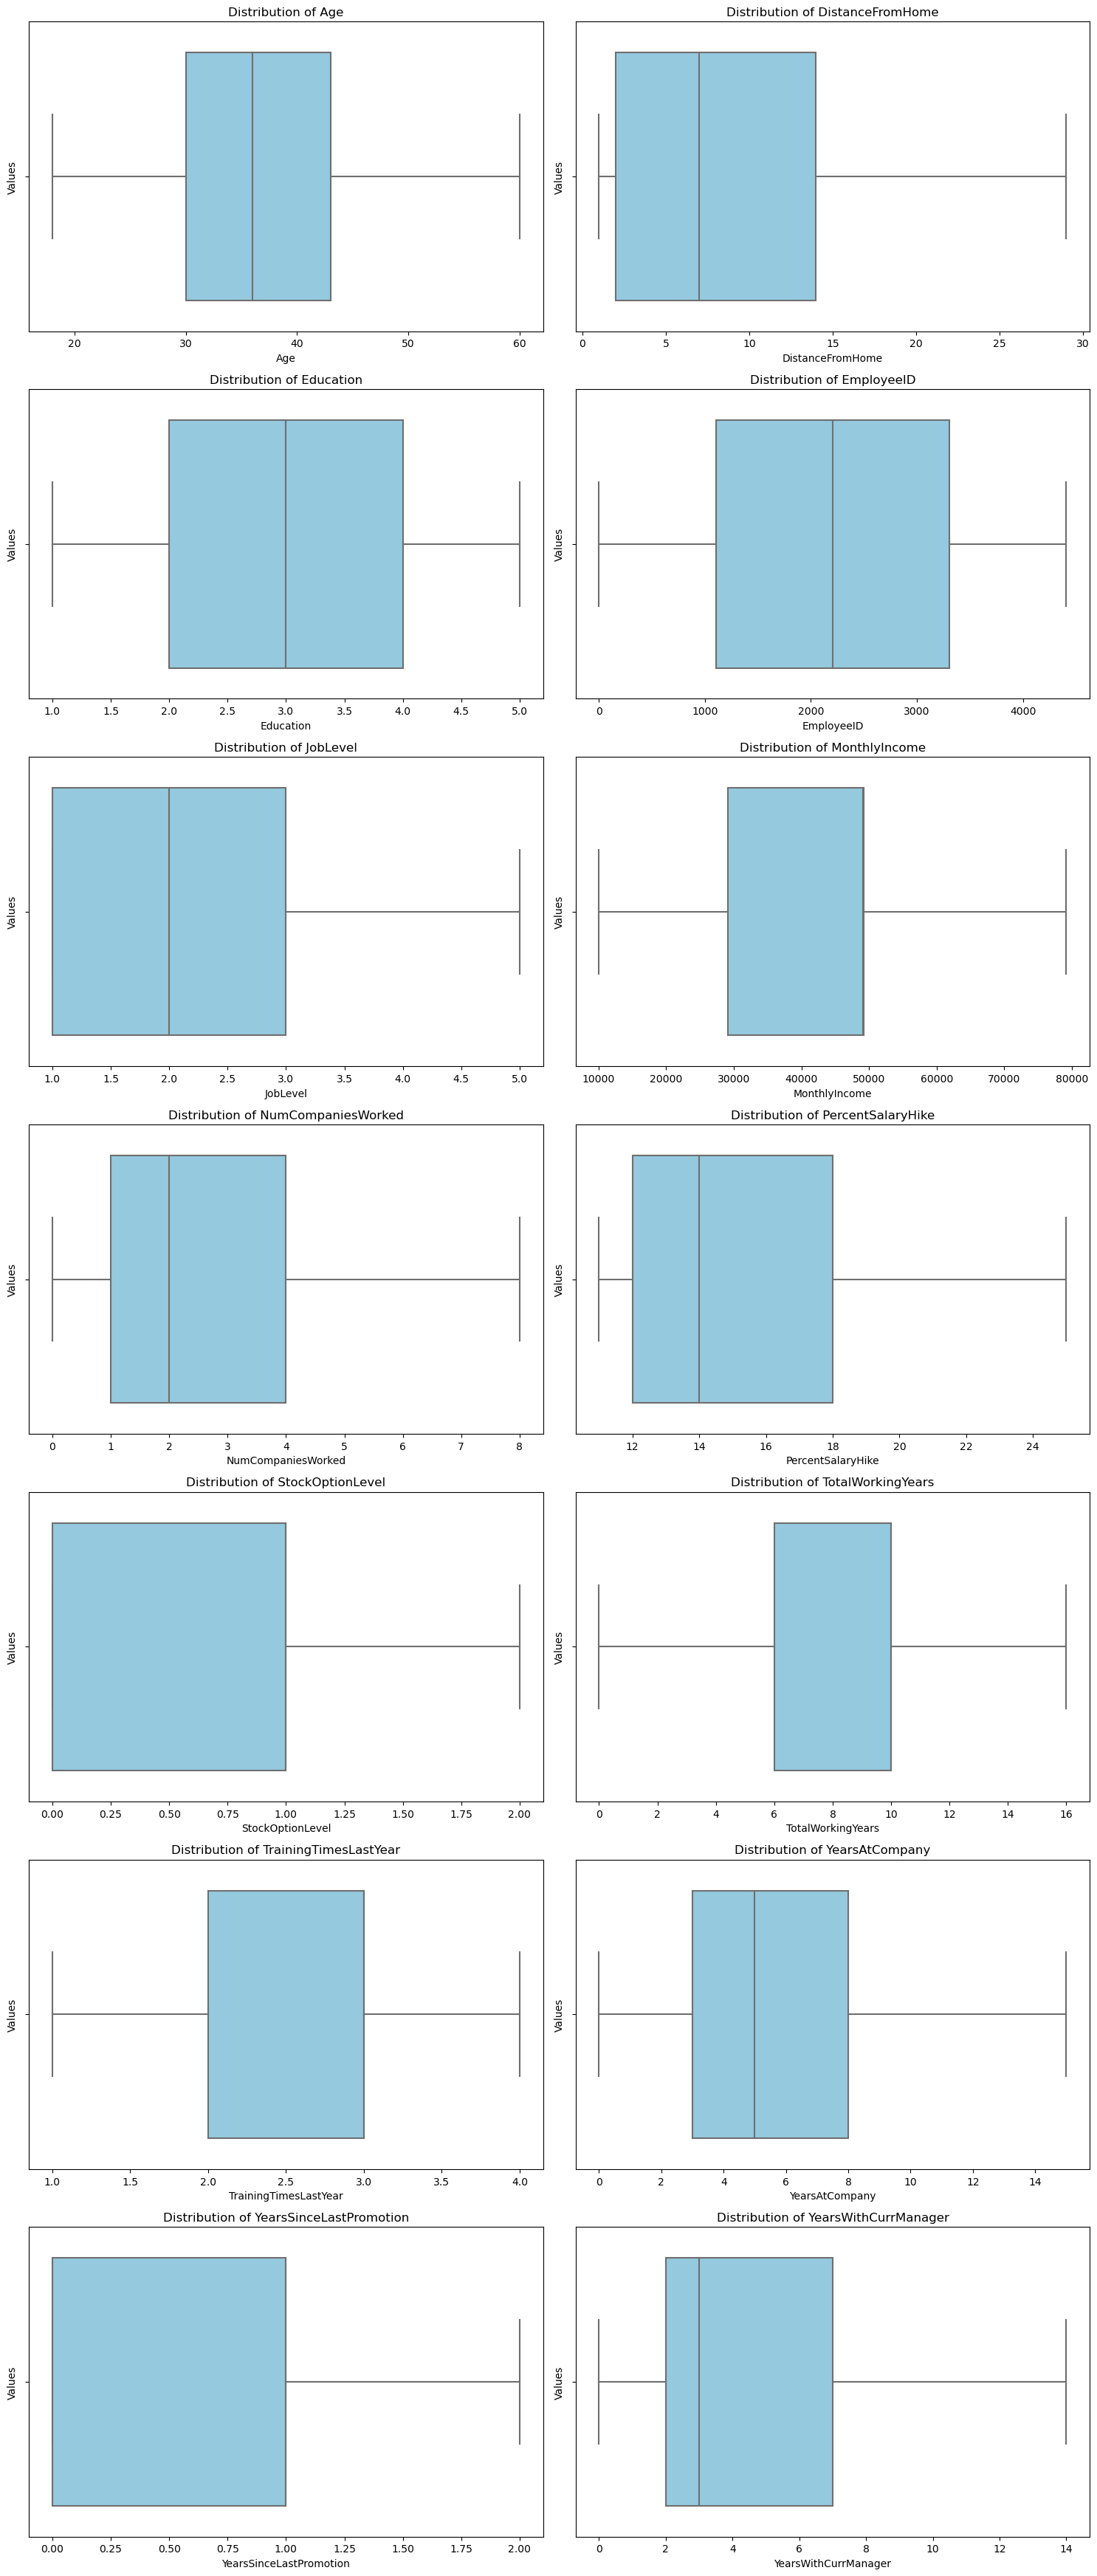

In [169]:
# Fonction pour visualiser la distribution des caractéristiques numériques à l'aide de boîtes à moustaches
visualize_numeric_features_boxplot(general_data)

(visualize_numeric_features_boxplot(general_data)) montre une bonne distribution des données, cela indique généralement plusieurs points positifs dans l'ensemble de données :

* L'absence de points au-delà des moustaches ou leur présence limitée suggère qu'il n'y a pas de valeurs aberrantes évidentes.
Cela renforce la fiabilité des données et facilite une interprétation plus robuste.


* En visualisant plusieurs caractéristiques numériques côte à côte, vous pouvez comparer leurs distributions respectives.
Des caractéristiques similaires dans leur dispersion peuvent faciliter les comparaisons et les analyses conjointes.

* La bonne distribution des données prépare le terrain pour des analyses statistiques plus approfondies et pour la modélisation prédictive.

==> En résumé, une visualisation montrant une bonne distribution des données suggère une qualité de données satisfaisante, ce qui est essentiel pour des analyses précises et pour la construction de modèles prédictifs fiables. Cela permet également de gagner en confiance dans l'ensemble de données lors de l'exploration et de l'interprétation des caractéristiques numériques.

### **Export Dataset**
Exportation du DataFrame 'general_data' vers un fichier CSV

In [170]:
general_data.to_csv('./new_general_data.csv', index=False)